In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression   
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

# Ignore deprecation, future, and user warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

# Configure inline backend figure format
%config InlineBackend.figure_format = 'retina'

# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [152]:
# reading the data
df = pd.read_csv("/Users/anahitasaxena/MyProjects/churn prediction/churn.csv", index_col=0)


In [153]:
# The first 5 observation 
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [154]:
# The size of the data set 
df.shape

(10000, 13)

In [155]:
# Feature information
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [156]:
# Removing variables that will not affect the dependent variable
df = df.drop(["CustomerId","Surname"], axis = 1)


In [157]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


In [158]:
# categorical Variables
categorical_variables = ['Geography','Gender','HasCrCard','IsActiveMember']
numeric_variables =['CreditScore', 'Age', 'Balance','Tenure','NumOfProducts','EstimatedSalary']
numeric_variables,categorical_variables

(['CreditScore',
  'Age',
  'Balance',
  'Tenure',
  'NumOfProducts',
  'EstimatedSalary'],
 ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])

<Axes: xlabel='IsActiveMember', ylabel='count'>

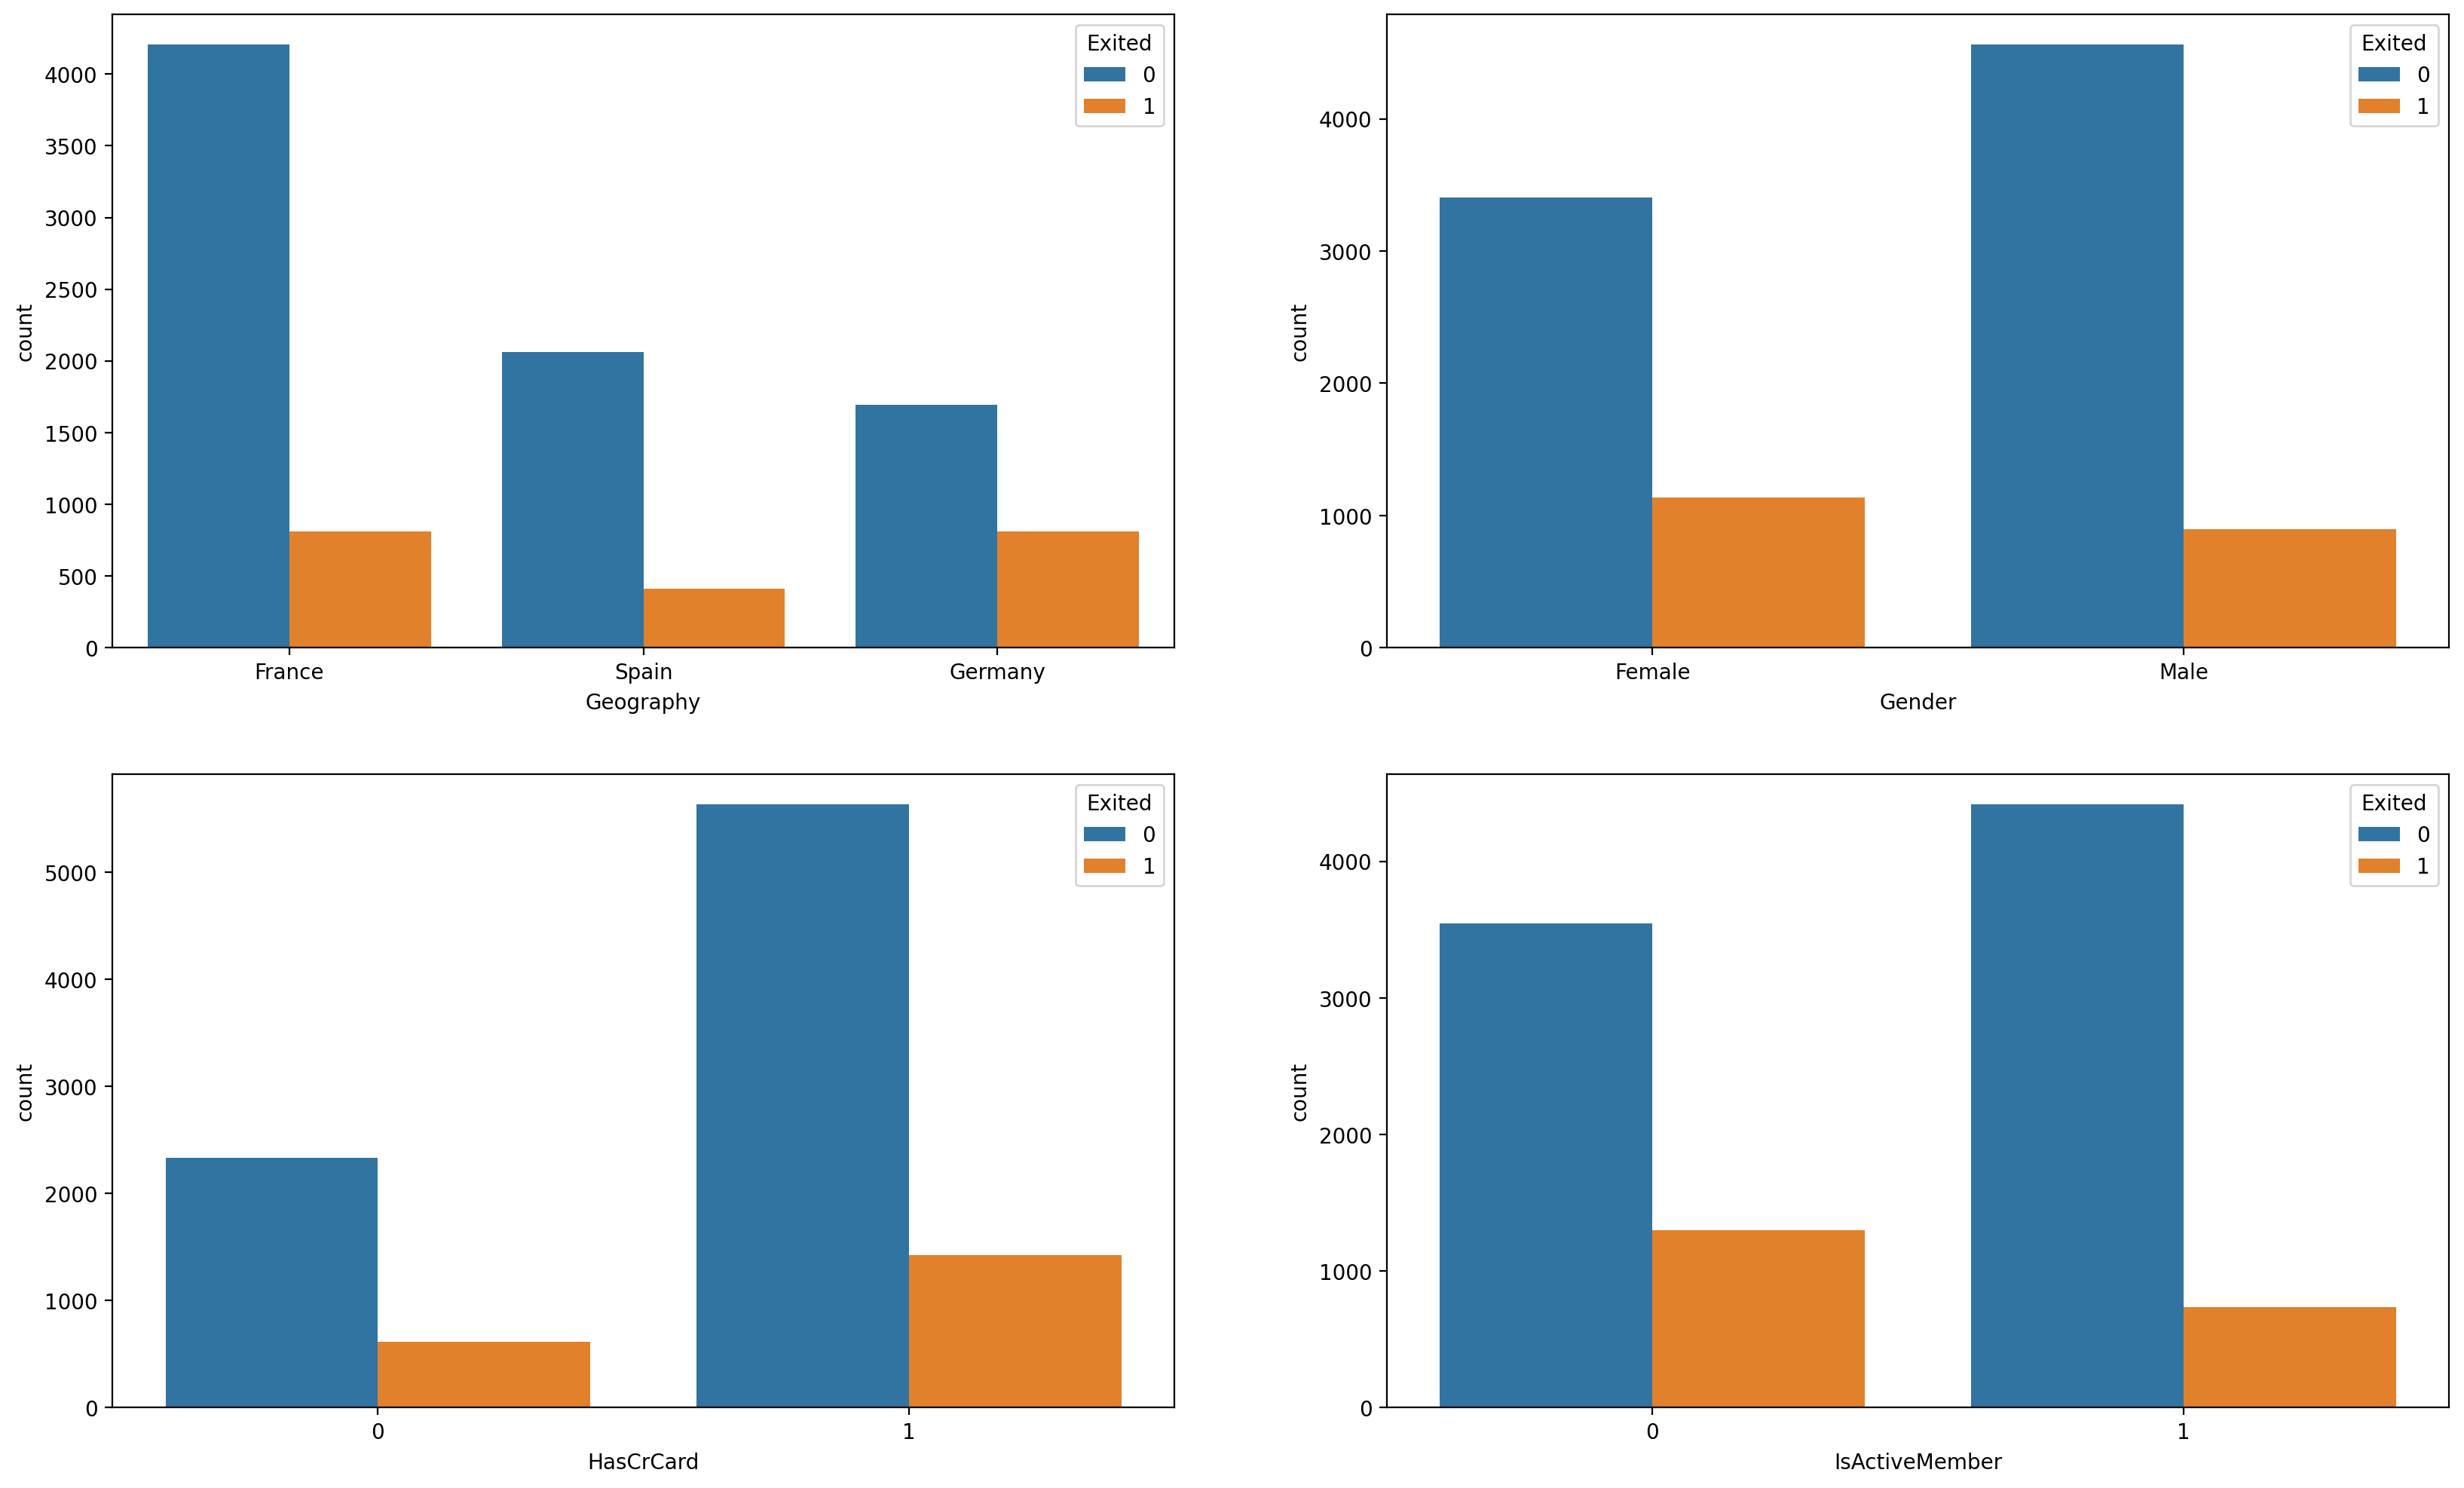

In [159]:
# categorical Variables
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

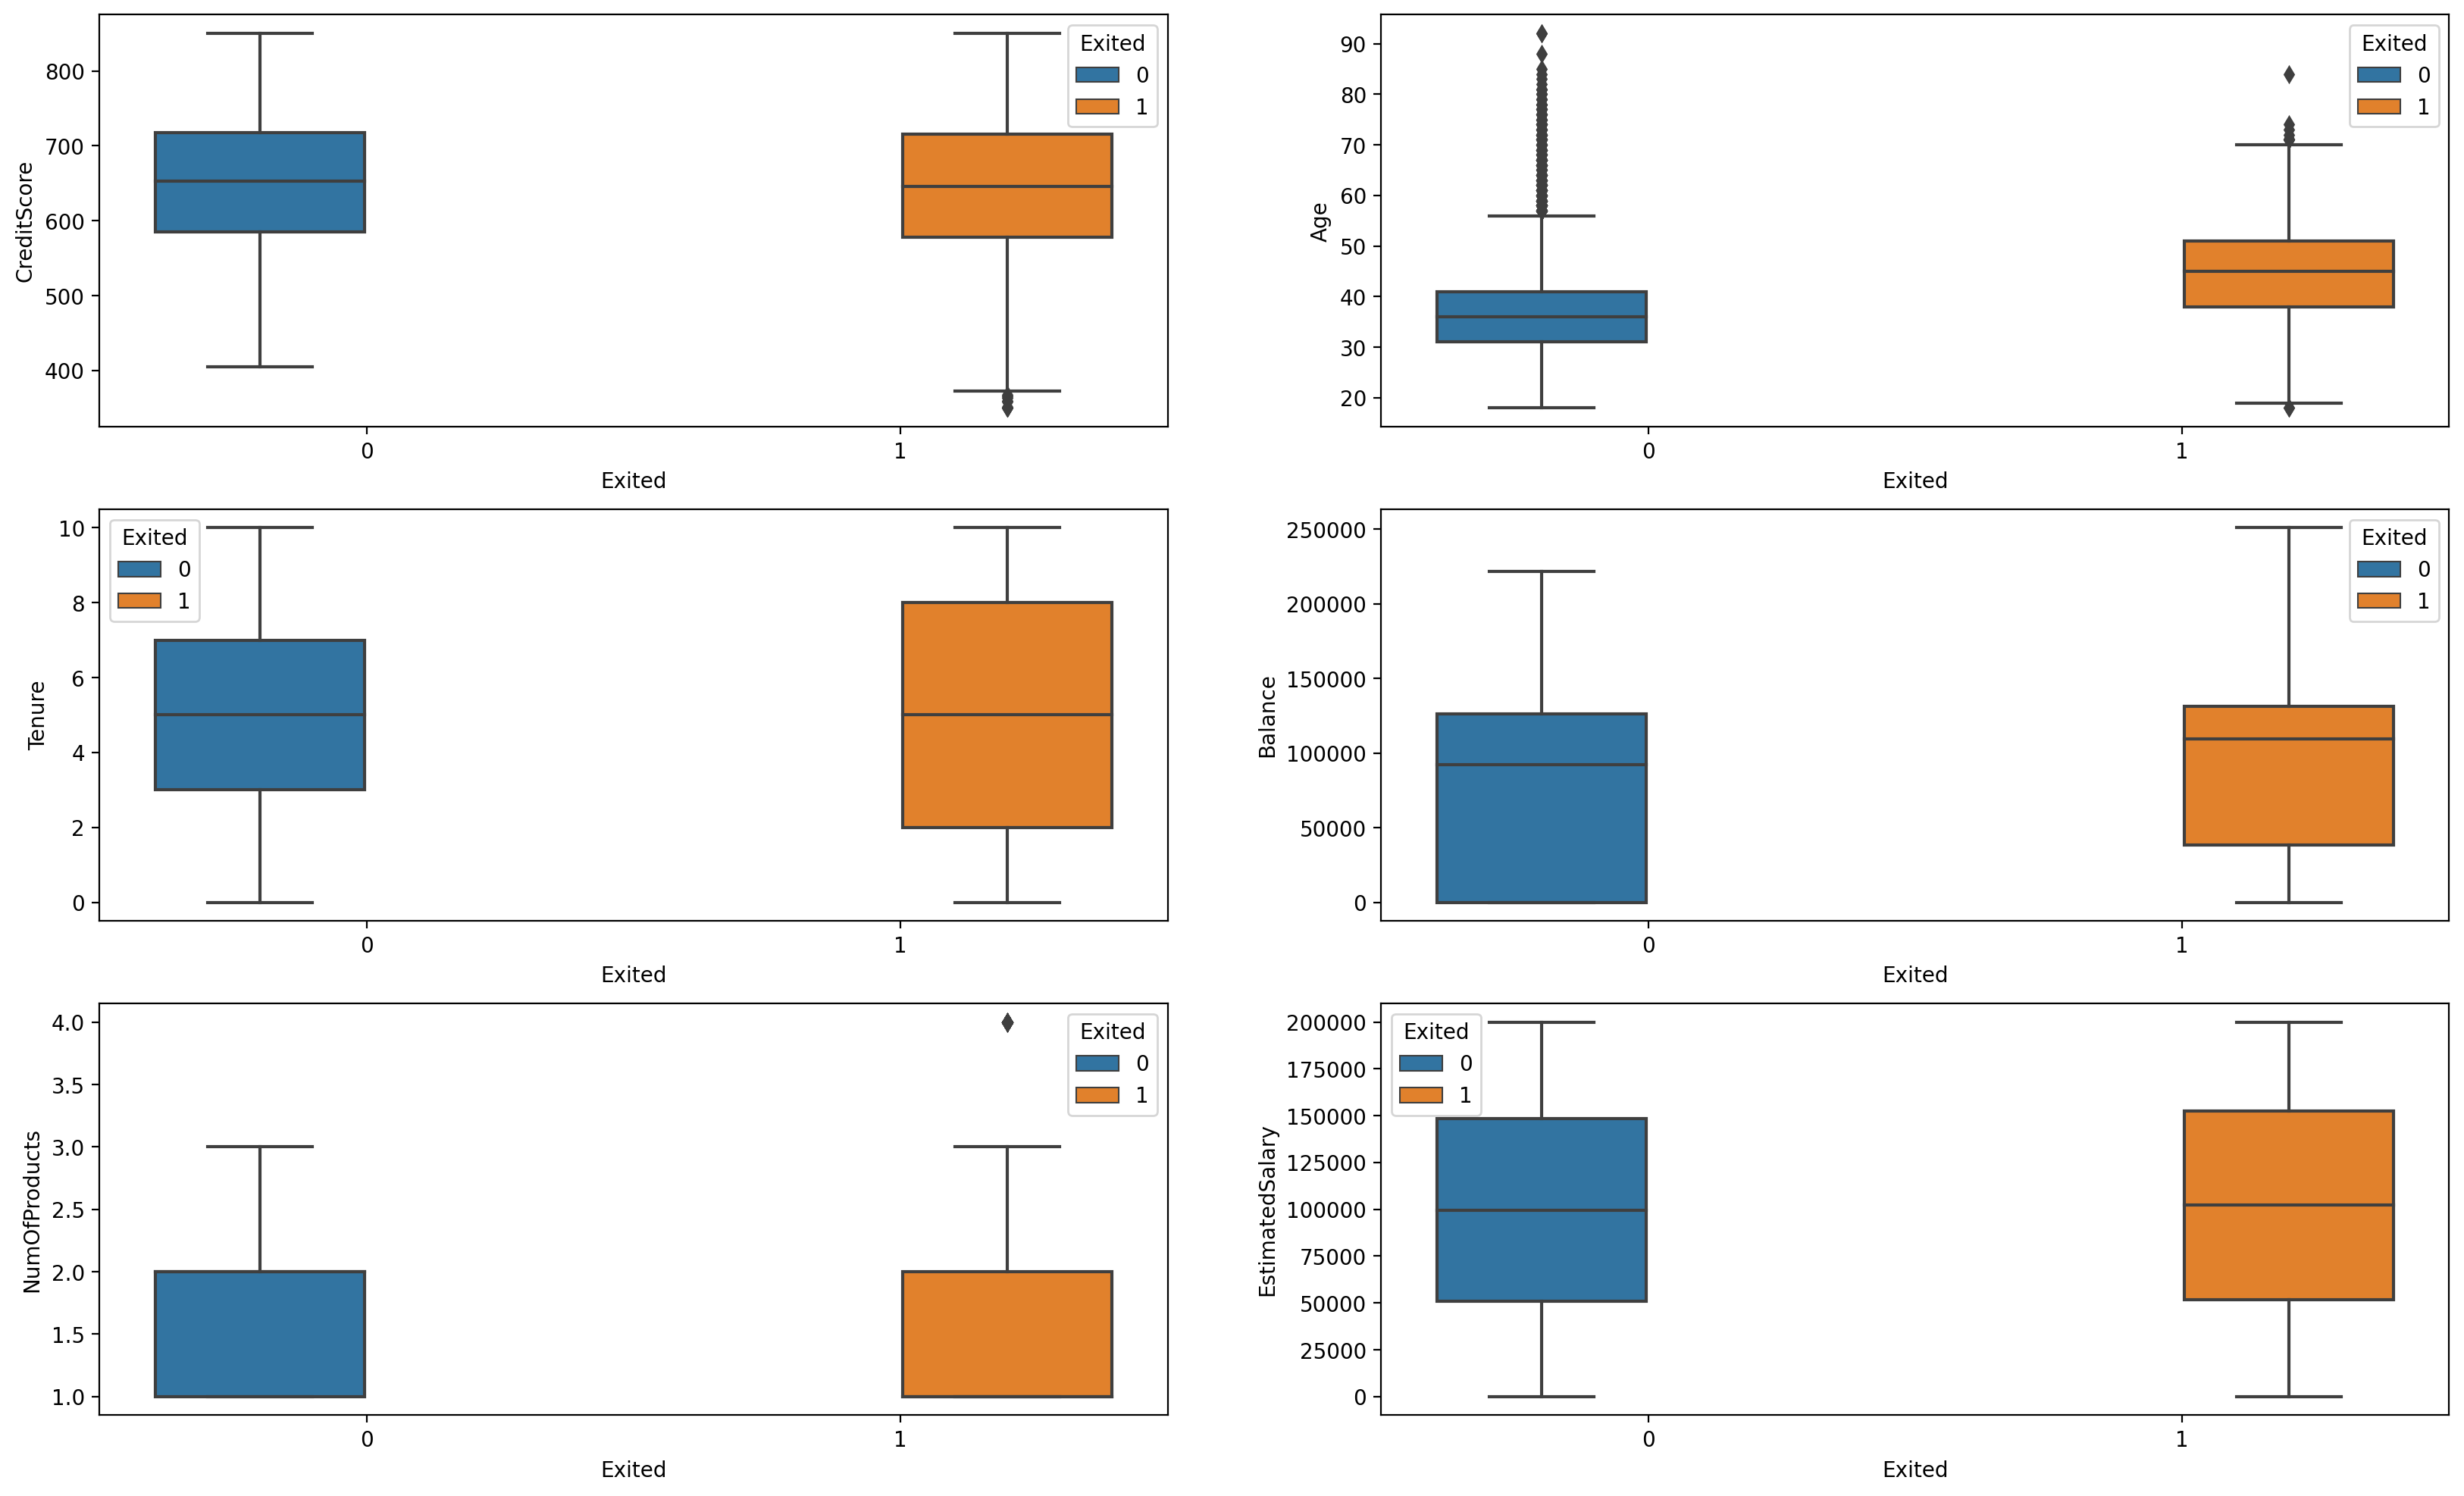

In [160]:
# Numeric Variables
# Relations based on the continuous numeric data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [161]:
# Frequency of classes of dependent variable
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [162]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]
# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]


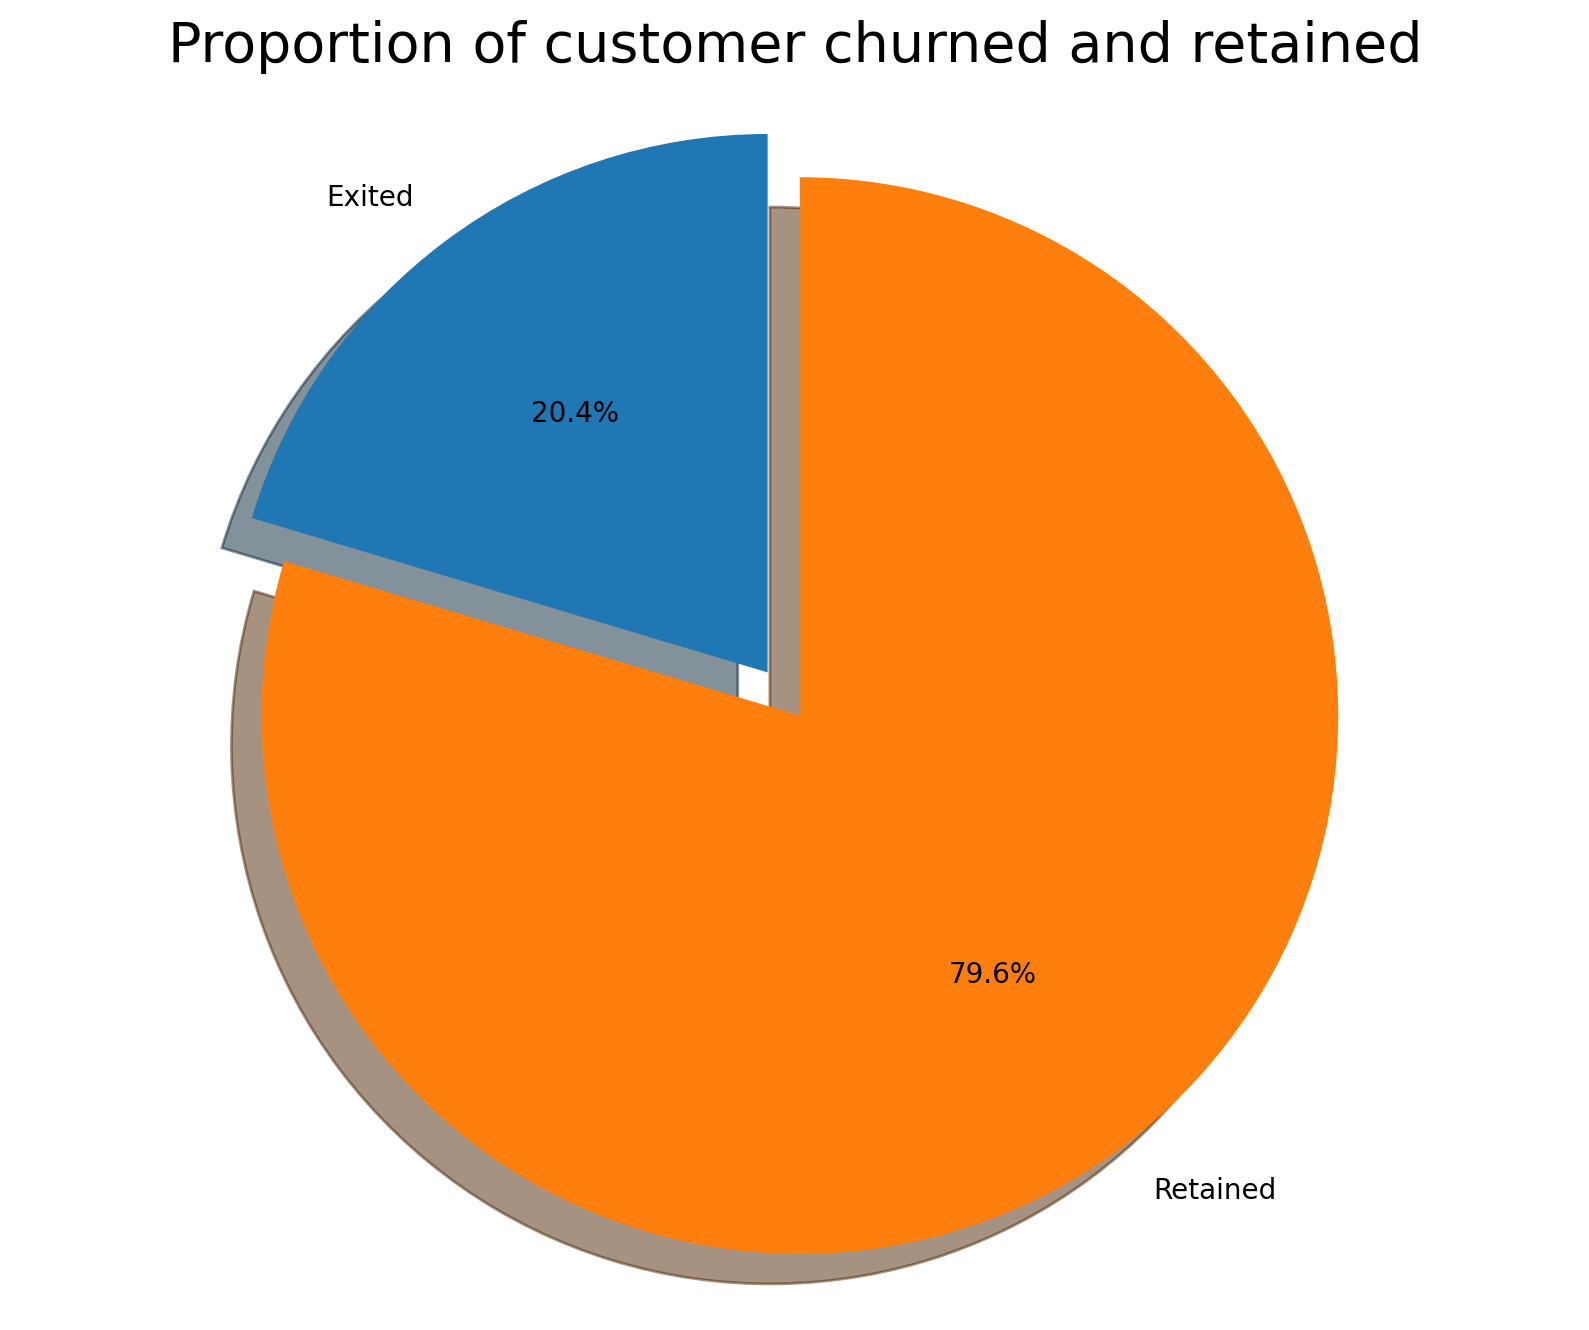

In [163]:
# see churn to not churn ratio in dataset
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

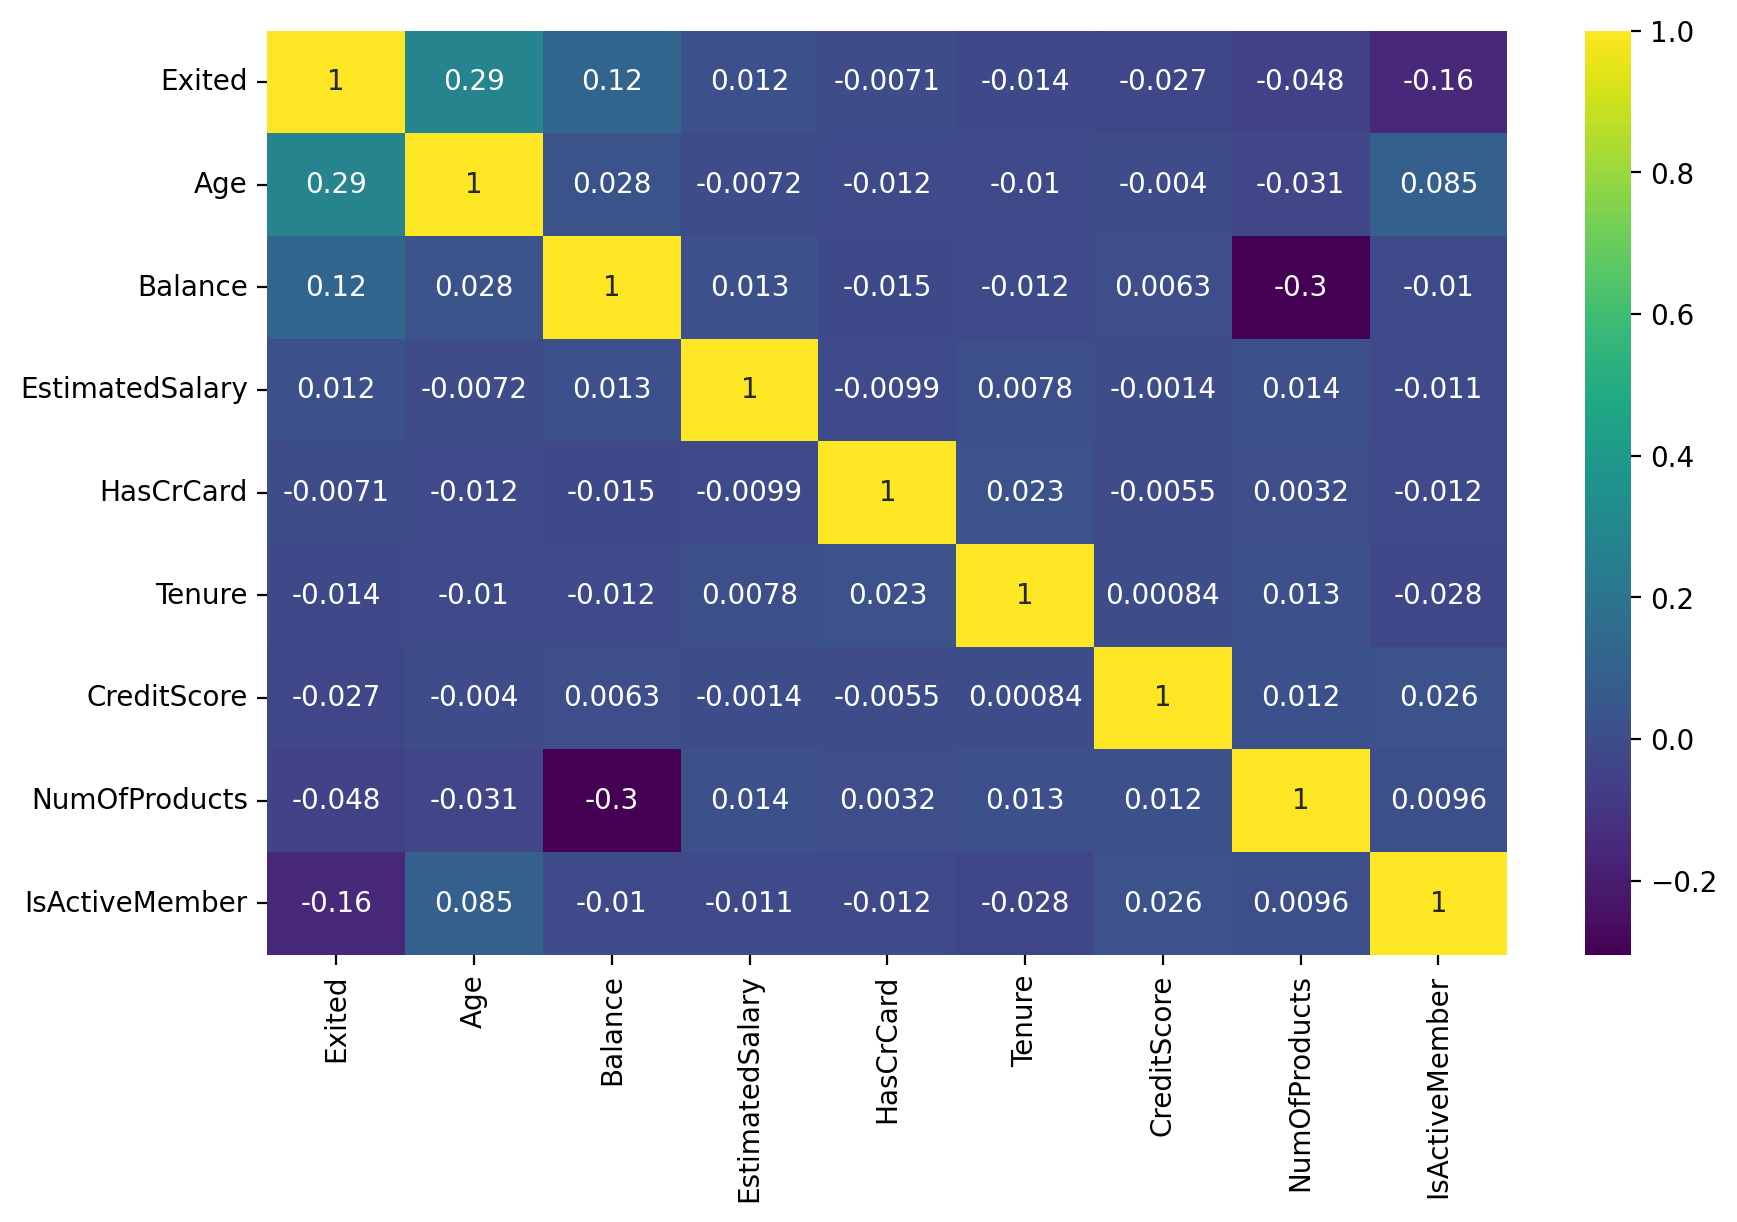

In [164]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
k = 10
cols = df[numeric_cols].corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()


In [165]:
#check for MISSING VALUES

df.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [166]:
# check for OUTLIERS

def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

def has_outliers(dataframe, numeric_columns, plot=False):
    variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [167]:
numeric_variables =['CreditScore', 'Age', 'Balance','EstimatedSalary']

for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers") 

CreditScore has  [] Outliers
Age has  [] Outliers
Balance has  [] Outliers
EstimatedSalary has  [] Outliers


In [168]:
# we standardize tenure with age
df["NewTenure"] = df["Tenure"]/df["Age"]
# we standardize Balance with Salary
df["NewBalanceSalaryRatio"]=df["Balance"]/df["EstimatedSalary"]

df["NewCreditsScore"] = pd.qcut(df['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
df["NewAgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])


In [169]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewBalanceSalaryRatio,NewCreditsScore,NewAgeScore
RowNumber,,,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,0.000000,3,6
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,0.744677,2,6
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1.401375,1,6
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,0.000000,5,5
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,1.587055,6,6


In [170]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = []
for i in lst:
    if (df[i].dtype == np.str or df[i].dtype == np.object):
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,-1)
        remove.append(i)
df = df.drop(remove, axis=1)


In [171]:
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewBalanceSalaryRatio,NewCreditsScore,NewAgeScore,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0.000000,3,6,1,-1,-1,1,-1
2,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0.744677,2,6,-1,1,-1,1,-1
3,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1.401375,1,6,1,-1,-1,1,-1
4,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0.000000,5,5,1,-1,-1,1,-1
5,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,1.587055,6,6,-1,1,-1,1,-1


In [172]:
#testing

In [173]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
# Models for Classification
models = [('LR', LogisticRegression(random_state=123456)),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456))
         ]
results = []
names = []
print("MODEL : MEAN ACCURACY ACROSS 10 FOLDS")
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


MODEL : MEAN ACCURACY ACROSS 10 FOLDS
LR: 0.792400 (0.008188)
CART: 0.790600 (0.005903)
RF: 0.861300 (0.009045)


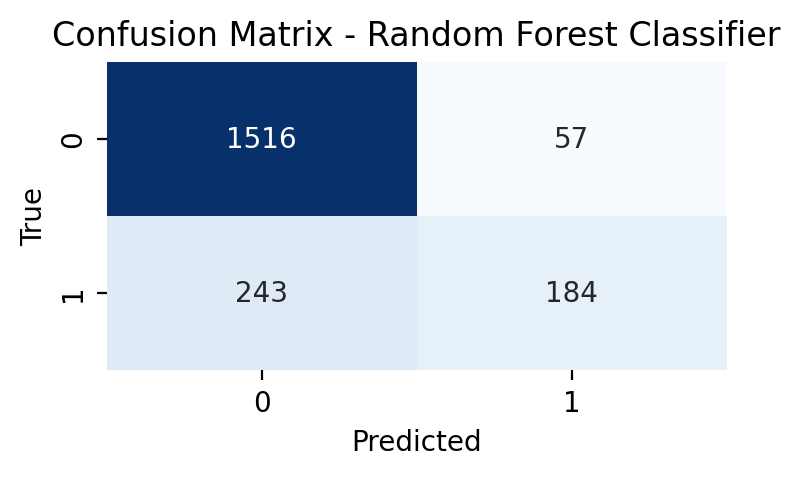

True Positive :  184
True Negative :  1516
False Positive:  57
False Negative:  243


In [174]:
#CONFUSION MATRIX - RF
model_RF = RandomForestClassifier(random_state=123456)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)


conf_mat = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', linewidths=.0005, cbar=False)

# Add labels, title, and customize plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])



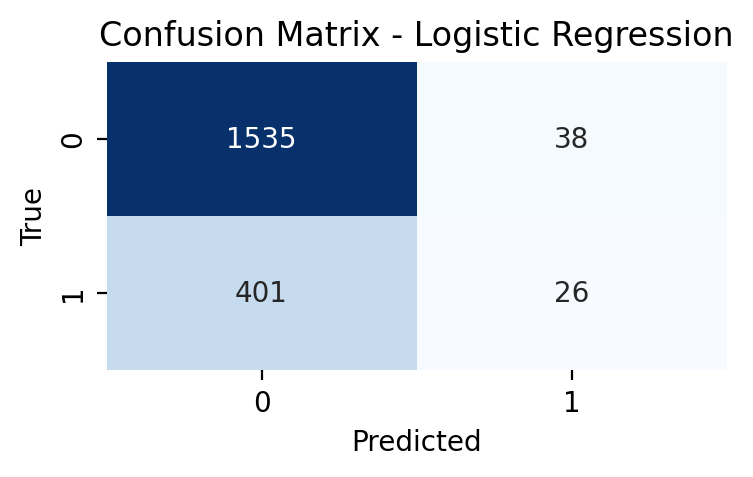

True Positive :  26
True Negative :  1535
False Positive:  38
False Negative:  401


In [175]:
# CONFUSION MATRIX - LR
model_LR = LogisticRegression(random_state=123456)
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)


conf_mat = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', linewidths=.0005, cbar=False)

# Add labels, title, and customize plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])


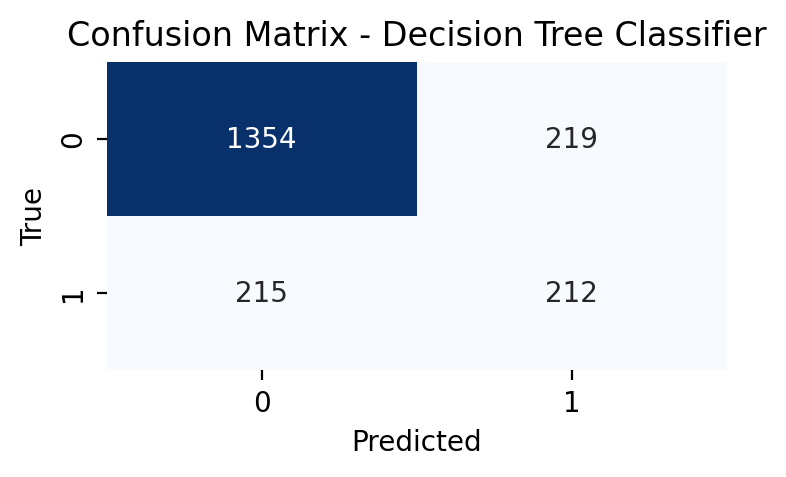

True Positive :  212
True Negative :  1354
False Positive:  219
False Negative:  215


In [176]:
#CONFUSION MATRIX - CART
model_CART = DecisionTreeClassifier(random_state=123456)
model_CART.fit(X_train, y_train)
y_pred = model_CART.predict(X_test)


conf_mat = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', linewidths=.0005, cbar=False)

# Add labels, title, and customize plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])


In [177]:
print("LOGISTIC REGRESSION")
print(classification_report(model_LR.predict(X_test),y_test))
print("DECISION TREE")
print(classification_report(model_CART.predict(X_test),y_test))
print("RANDOM FOREST")
print(classification_report(model_RF.predict(X_test),y_test))

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      1936
           1       0.06      0.41      0.11        64

    accuracy                           0.78      2000
   macro avg       0.52      0.60      0.49      2000
weighted avg       0.95      0.78      0.85      2000

DECISION TREE
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1569
           1       0.50      0.49      0.49       431

    accuracy                           0.78      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.78      0.78      0.78      2000

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1759
           1       0.43      0.76      0.55       241

    accuracy                           0.85      2000
   macro avg       0.70      0.81      0.73      2000
weighted avg       0.90   

In [178]:
forest = RandomForestClassifier(n_estimators = 850, max_depth = 19, random_state = 1200)

In [179]:
print("RANDOM FOREST")
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
forest.fit(train_x,train_y)
forest.score(test_x, test_y)
pred_test = forest.predict(test_x)


RANDOM FOREST


In [180]:
print(classification_report(forest.predict(X),y))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8153
           1       0.87      0.96      0.92      1847

    accuracy                           0.97     10000
   macro avg       0.93      0.97      0.95     10000
weighted avg       0.97      0.97      0.97     10000



In [181]:
print("now, cart")
cart = DecisionTreeClassifier(random_state=123456)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
cart.fit(train_x,train_y)
cart.score(test_x, test_y)
pred_test = cart.predict(test_x)
print(classification_report(cart.predict(X),y))

now, cart
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7950
           1       0.88      0.87      0.87      2050

    accuracy                           0.95     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.95      0.95      0.95     10000

